In [11]:
import sys
print(sys.executable)


c:\Users\Admin\AppData\Local\Programs\Python\Python311\python.exe


In [12]:
!c:\Users\Admin\AppData\Local\Programs\Python\Python311\python.exe -m pip install pandas matplotlib


  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/ed/8c/87ddf1fcb55d11f9f847e3c69bb1c6f8e46e2f40ab1a2d2abadb2401b007/pandas-2.2.3-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/d7/68/0d03098b3feb786cbd494df0aac15b571effda7f7cbdec267e8a8d398c16/matplotlib-3.10.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for numpy>=1.23.2 from https://files.pythonhosted.org/packages/8b/72/10c1d2d82101c468a28adc35de6c77b308f288cfd0b88e1070f15b98e00c/numpy-2.2.4-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------------------------- ------------ 41.0/60.8 kB 281.8 kB/s eta 0:00

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


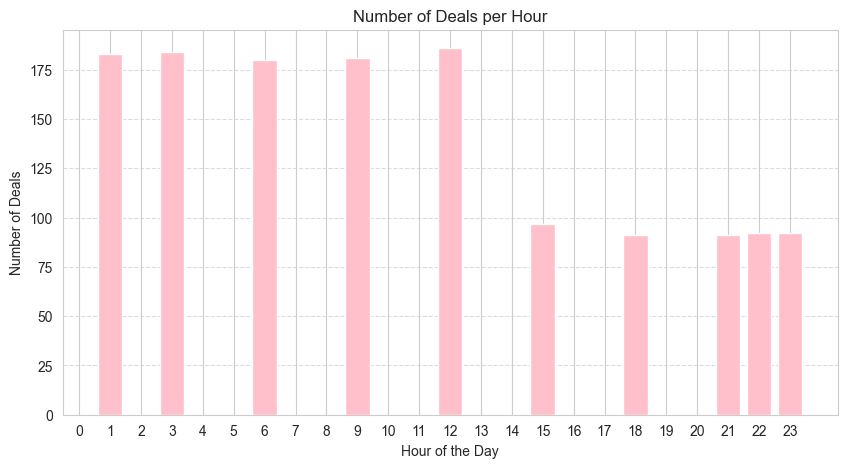

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("cleaned_ebay_deals.csv")


df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")


df = df.sort_values(by="timestamp")


df["hour"] = df["timestamp"].dt.hour


deals_per_hour = df["hour"].value_counts().sort_index()


plt.figure(figsize=(10,5))
plt.bar(deals_per_hour.index, deals_per_hour.values, color="pink")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Deals")
plt.title("Number of Deals per Hour")
plt.xticks(range(0, 24)) 
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [18]:
!c:\Users\Admin\AppData\Local\Programs\Python\Python311\python.exe -m pip install seaborn



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


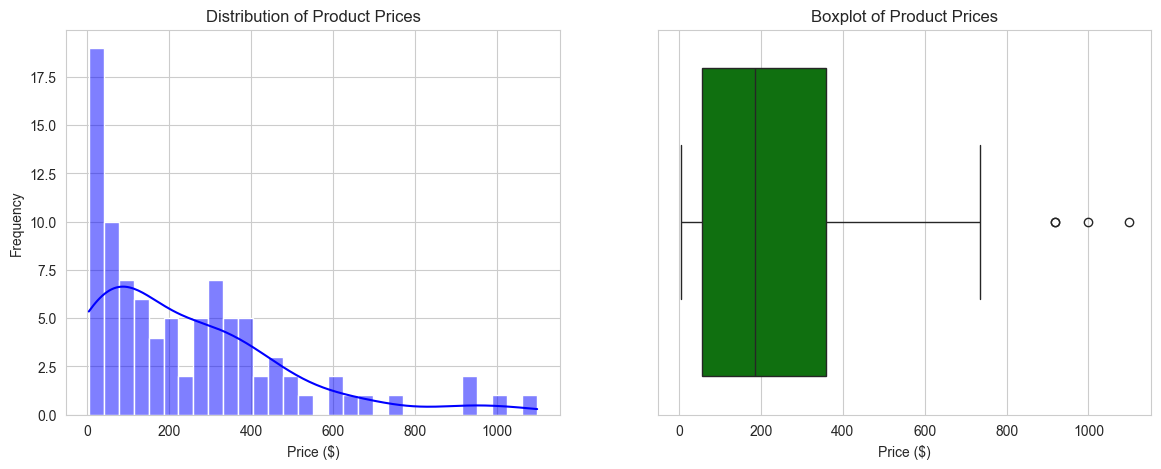

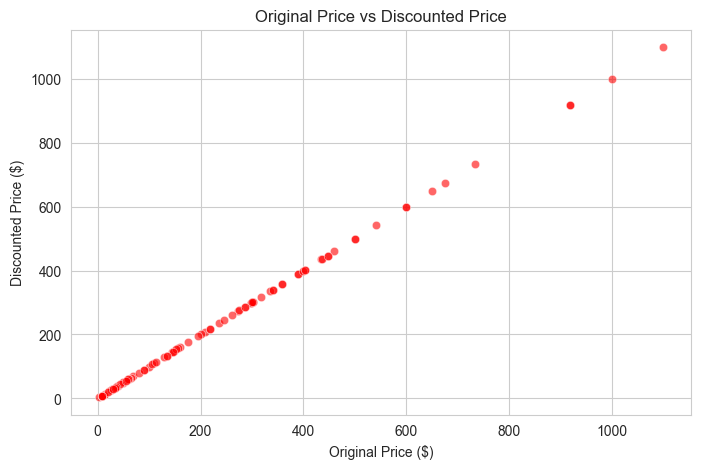

In [ ]:
import seaborn as sns


sns.set_style("whitegrid")


fig, axes = plt.subplots(1, 2, figsize=(14, 5))


sns.histplot(df["price"], bins=30, kde=True, ax=axes[0], color="blue")
axes[0].set_title("Distribution of Product Prices")
axes[0].set_xlabel("Price ($)")
axes[0].set_ylabel("Frequency")


sns.boxplot(x=df["price"], ax=axes[1], color="green")
axes[1].set_title("Boxplot of Product Prices")
axes[1].set_xlabel("Price ($)")

plt.show()

plt.figure(figsize=(8, 5))

sns.scatterplot(x=df["original price"], y=df["price"], alpha=0.6, color="red")
plt.title("Original Price vs Discounted Price")
plt.xlabel("Original Price ($)")
plt.ylabel("Discounted Price ($)")
plt.grid(True)

plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_18964\2489620209.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Keyword", y="Count", data=keyword_df, palette="viridis")


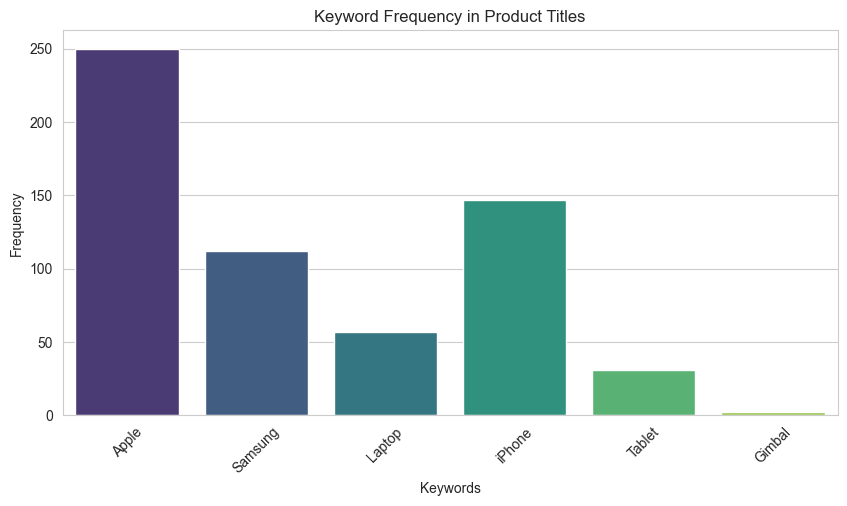

In [25]:
keywords = ["Apple", "Samsung", "Laptop", "iPhone", "Tablet", "Gimbal"]
keyword_counts = {keyword: df["title"].str.contains(keyword, case=False, na=False).sum() for keyword in keywords}
keyword_df = pd.DataFrame(list(keyword_counts.items()), columns=["Keyword", "Count"])

plt.figure(figsize=(10, 5))
sns.barplot(x="Keyword", y="Count", data=keyword_df, palette="viridis")
plt.xlabel("Keywords")
plt.ylabel("Frequency")
plt.title("Keyword Frequency in Product Titles")
plt.xticks(rotation=45)
plt.show()


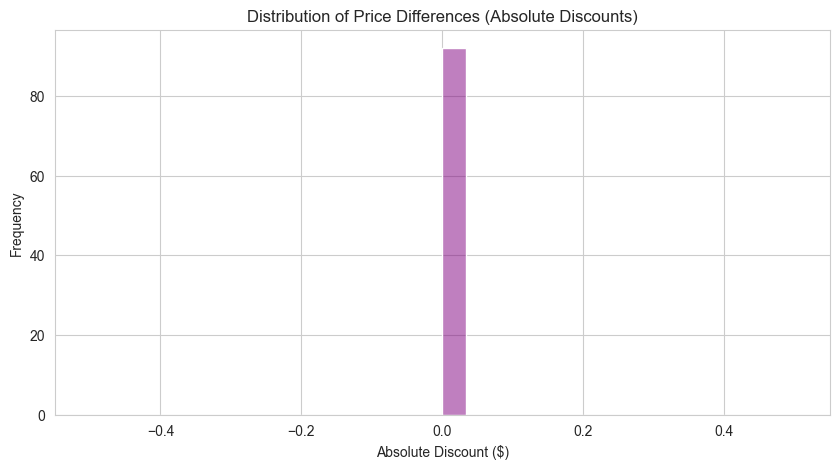

In [26]:
df["absolute_discount"] = df["original price"] - df["price"]

plt.figure(figsize=(10, 5))
sns.histplot(df["absolute_discount"], bins=30, kde=True, color="purple")
plt.xlabel("Absolute Discount ($)")
plt.ylabel("Frequency")
plt.title("Distribution of Price Differences (Absolute Discounts)")
plt.show()

In [ ]:

top_discounts = df.sort_values(by="discount_percentage", ascending=False).head(5)


print(top_discounts[["title", "price", "original price", "discount_percentage", "url"]])


                                               title   price  original price  \
0                            Microsoft Xbox Series S  299.00          299.00   
1  Apple iPhone 15 Pro 256gb ( Unlocked) US E-Sim...  674.99          674.99   
2  Google Pixel 8 Pro 128GB Factory Unlocked - Ex...  434.99          434.99   
5  NEW UNLOCKED SAMSUNG GALAXY S20+ PLUS 5G SM-G9...  207.77          207.77   
3  Apple Macbook Air MLY33LL/A 2022 M2 - Magsafe ...  650.00          650.00   

   discount_percentage                                                url  
0                  0.0  https://www.ebay.com/itm/266190900217?_trkparm...  
1                  0.0  https://www.ebay.com/itm/166613095133?_trkparm...  
2                  0.0  https://www.ebay.com/itm/226348022590?_trkparm...  
5                  0.0  https://www.ebay.com/itm/194520534603?_trkparm...  
3                  0.0  https://www.ebay.com/itm/166206685749?_trkparm...  
